<!--NAVIGATION-->
| [Contents](For_The_Bit_00-Introduction.ipynb) | [Request All Intraday Data](For_The_Bit_01-02_Request_All_Intraday_Data.ipynb) >

# For The Bit

## 1 - Getting my `fitbit` data 

### Part I. Preliminaries, and using the `fitbit` API with `curl`

In this notebooks we set up your environment and access to the fitbit API, and download some example intra day time series with command line tools.


## Getting access to your `fitbit` data via the API

First I followed the strategy here:  
http://shishu.info/2016/06/how-to-download-your-fitbit-second-level-data-without-coding/

It worked! Even if it is an imperfect workaround, it is still a relatively simple way to get programmatic access to the `fitbit` API.  Just copy the `curl` code.  The relevant part is:

```bash

curl -H "Authorization: Bearer [really-long-text-string]" https://api.fitbit.com/1/user/-/profile.json

```

Copy the **`[really-long-text-string]`** part and put that into a secret file.  
It's important that you **do not post this secret file to version control or anywhere public**.  
In fact saving it in plain text is probably a bad idea too, but this seemed easy enough.  
This is your private key for accessing/modifying your `fitbit` data and account.

This notebook assumes you have done all of the above and saved the key to **`../curl_key.txt`**.

In [1]:
! ls ../

README.md    curl_key.txt data         notebooks


### Note on startup script
As noted in the README.md, all my notebooks were run with an IPython Startup script.  You'll need to mimic my startup script in `~/.ipython/profile_default/startup` or copy and paste the below lines of code to every notebook.

```ipython
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
#print("Ran IPython Notebook Startup Script.")
```

This startup script applies nice defaults for Macbook Pros with retina displays, among other plotting and import defaults.

In [2]:
import json
import pandas as pd

### Make sub-directories in `data/`
Replace *user* with your user name

In [3]:
#! mkdir ../data/gully
#! tree -d ../

```text
../
├── data
│   └── *user*
│       ├── exercise
│       │   ├── HR
│       │   ├── logs
│       │   └── tcx
│       ├── intraday
│       │   ├── HR
│       │   ├── sleep
│       │   └── steps
│       └── weight
│           ├── logs
│           └── ts
└── notebooks
```

Uncomment and fill in your secret key and user name below to fetch your fitbit user profile with `curl`:
- Replace `#####SECRET_KEY#####` with the text of your secret key
- Replace `####USERNAME####` with your user name  

You can run this on a command line if you don't want to have it in a Jupyter notebook.

In [4]:
#!curl -H "Authorization: Bearer #####SECRET_KEY#####" https://api.fitbit.com/1/user/-/profile.json > ../data/####USERNAME####/profile.json

In [5]:
! ls ../data/gully/

2017-01-01_1d_1min.json       intraday
HR_2017-01-01_1d_1min.json    profile.json
Sleep_2017-01-01_1d_1min.json weight
exercise


In [6]:
with open('../data/gully/profile.json') as f:
    json_profile = json.load(f)

In [7]:
profile = json_profile['user']

In [8]:
keys = profile.keys()

The `topBadges` key yields a long list, but everything else is a short text string.  Let's leave out `topBadges` and sort the list alphabetically.  I'll also remove some user ID info and my DOB ;).

In [9]:
subset_keys = sorted(set(keys) - set(['topBadges', 'dateOfBirth', 'avatar', 'avatar150', 'encodedId']))

In [10]:
for i, key in enumerate(subset_keys):
    print('{:<30}: {}'.format(key,profile[key]))

age                           : 31
autoStrideEnabled             : True
averageDailySteps             : 9826
clockTimeDisplayFormat        : 12hour
corporate                     : False
corporateAdmin                : False
country                       : US
displayName                   : Michael G.
displayNameSetting            : name
distanceUnit                  : en_US
features                      : {'exerciseGoal': True}
foodsLocale                   : en_US
fullName                      : Michael Gully-Santiago
gender                        : MALE
glucoseUnit                   : en_US
height                        : 170
heightUnit                    : en_US
locale                        : en_US
memberSince                   : 2016-12-16
mfaEnabled                    : False
offsetFromUTCMillis           : -28800000
startDayOfWeek                : SUNDAY
state                         : CA
strideLengthRunning           : 114.4
strideLengthRunningType       : default
strideLengthW

One interesting tidbit is that my `strideLengthRunning` and my `strideLengthWalking` differ.  I'm not sure how accurate this is because the next keywords suffixed by `type` both indicate *default*.  But still, let's examine them.

In [11]:
print('{:.2f}'.format(profile['strideLengthRunning']/profile['strideLengthWalking']))

1.62


Apparently my average running stride is (assumed to be?) 1.62 times my walking stride.  Neat.

## Intraday activity time series: steps at 1 min resolution.

Let's get the Activity intraday time series.

Again, update the line of code below for your own information.  
You'll also probably want to change the dates **`2017-01-01`** to one of the dates for which you have data available.

In [12]:
#!curl -H "Authorization: Bearer ######SECRET_KEY_HERE#######" https://api.fitbit.com/1/user/-/activities/steps/date/2017-01-01/1d/1min.json   > ../data/###USERNAME_HERE####/2017-01-01_1d_1min.json

In [13]:
with open('../data/gully/2017-01-01_1d_1min.json') as f:
    steps_intra_1min_json = json.load(f)

In [14]:
steps_intra_1min_json.keys()

dict_keys(['activities-steps', 'activities-steps-intraday'])

In [15]:
steps_intra_1min_json['activities-steps-intraday'].keys()

dict_keys(['datasetInterval', 'dataset', 'datasetType'])

In [16]:
steps_intra_1min = pd.DataFrame(steps_intra_1min_json['activities-steps-intraday']['dataset'])

In [17]:
steps_intra_1min['TimeStamp'] = pd.to_datetime('2017-01-01 '+steps_intra_1min.time)

In [18]:
steps_intra_1min.tail()

,time,value,TimeStamp
1435,23:55:00,0,2017-01-01 23:55:00
1436,23:56:00,0,2017-01-01 23:56:00
1437,23:57:00,0,2017-01-01 23:57:00
1438,23:58:00,0,2017-01-01 23:58:00
1439,23:59:00,0,2017-01-01 23:59:00


In [19]:
sns.set_context('notebook')

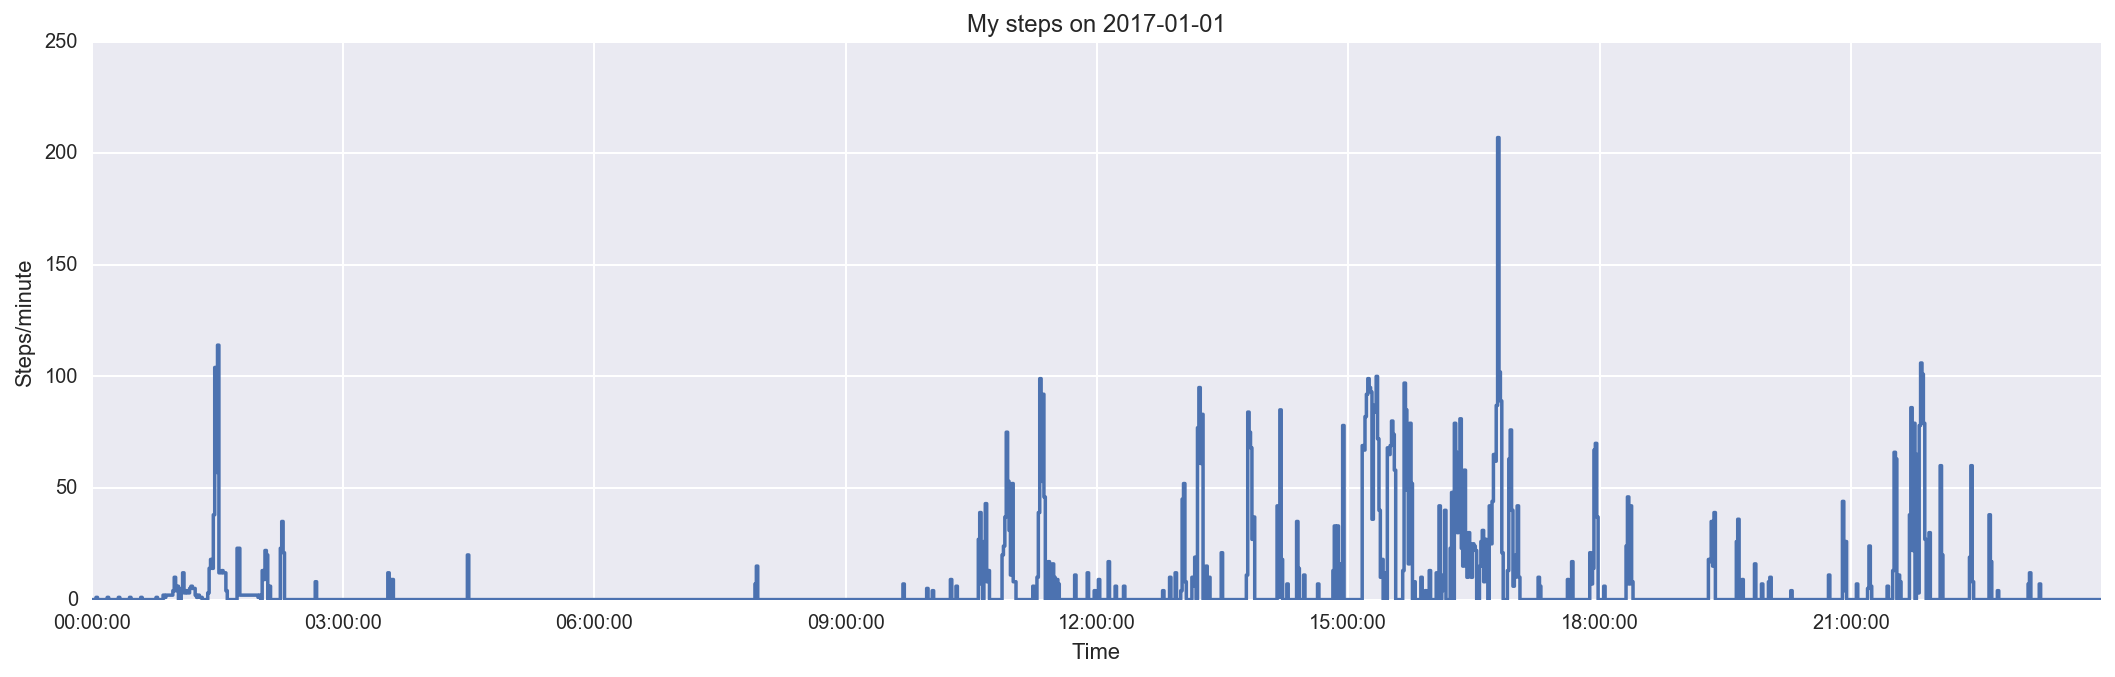

In [20]:
plt.figure(figsize=(18, 5))
plt.step(steps_intra_1min.TimeStamp, steps_intra_1min.value)
plt.ylabel('Steps/minute')
plt.xlabel('Time')
plt.title('My steps on 2017-01-01');

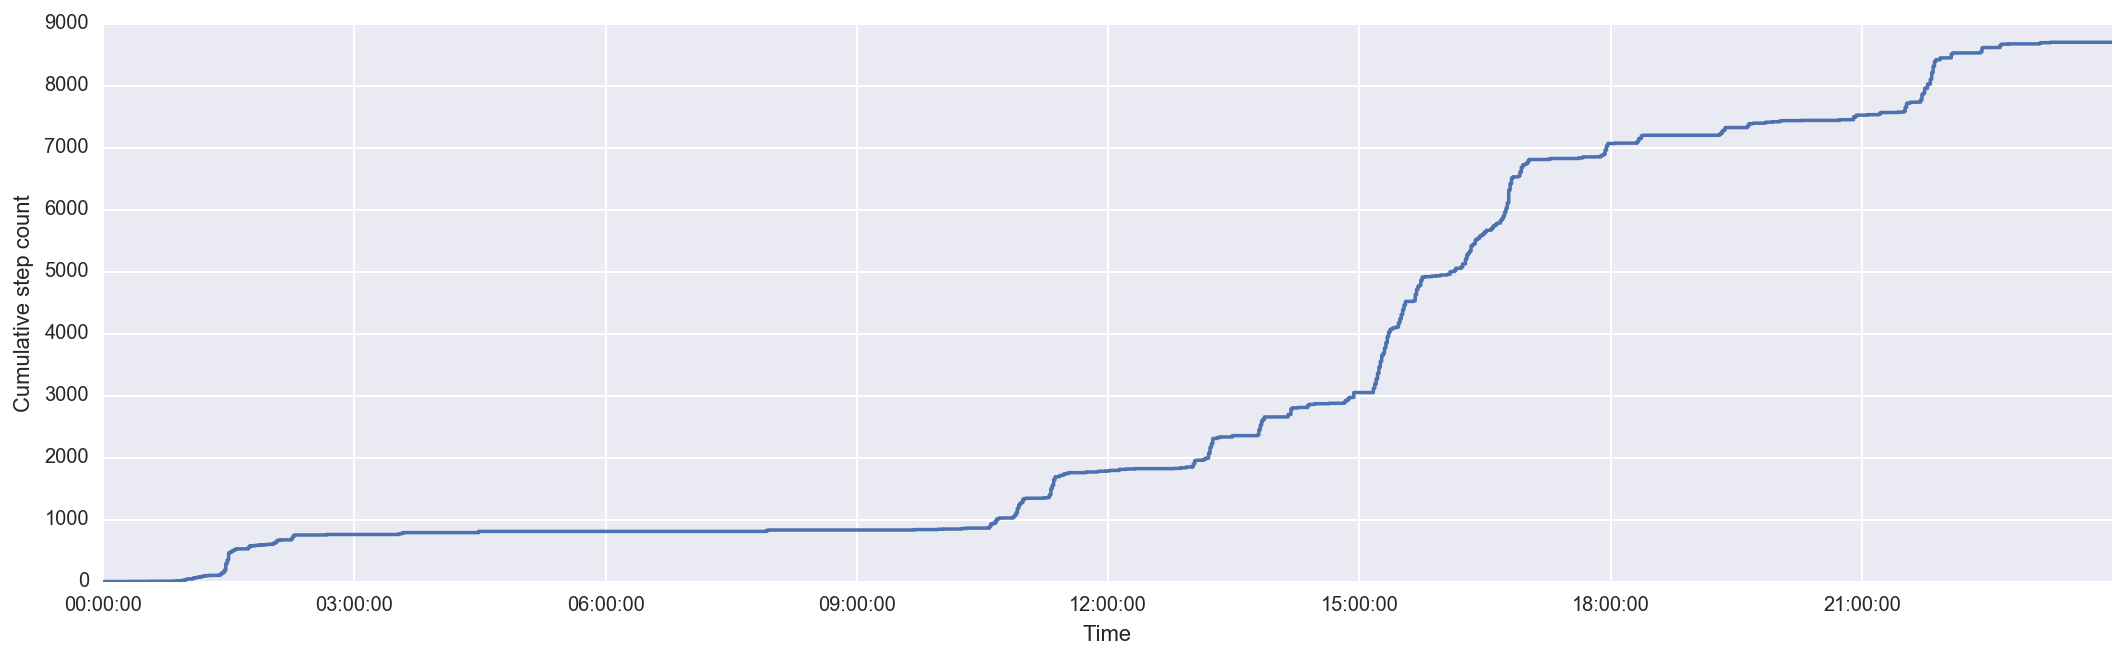

In [21]:
plt.figure(figsize=(18, 5))
plt.step(steps_intra_1min.TimeStamp, steps_intra_1min.value.cumsum())
plt.ylabel('Cumulative step count')
plt.xlabel('Time');

Awesome!!  There's so much to explore with steps alone, but let's experiment with Heart Rate.

## Intraday time series: Heart Rate at 1 minute resolution

In [22]:
#!curl -H "Authorization: Bearer ###SECRET_KEY####" https://api.fitbit.com/1/user/-/activities/heart/date/2017-01-01/1d/1min.json   > ../data/###USERNAME####/HR_2017-01-01_1d_1min.json

In [23]:
with open('../data/gully/HR_2017-01-01_1d_1min.json') as f:
    HR_intra_1min_json = json.load(f)

In [24]:
HR_intra_1min_json.keys()

dict_keys(['activities-heart-intraday', 'activities-heart'])

In [25]:
HR_intra_1min = pd.DataFrame(HR_intra_1min_json['activities-heart-intraday']['dataset'])

In [26]:
HR_intra_1min['TimeStamp'] = pd.to_datetime('2017-01-01 '+HR_intra_1min.time)

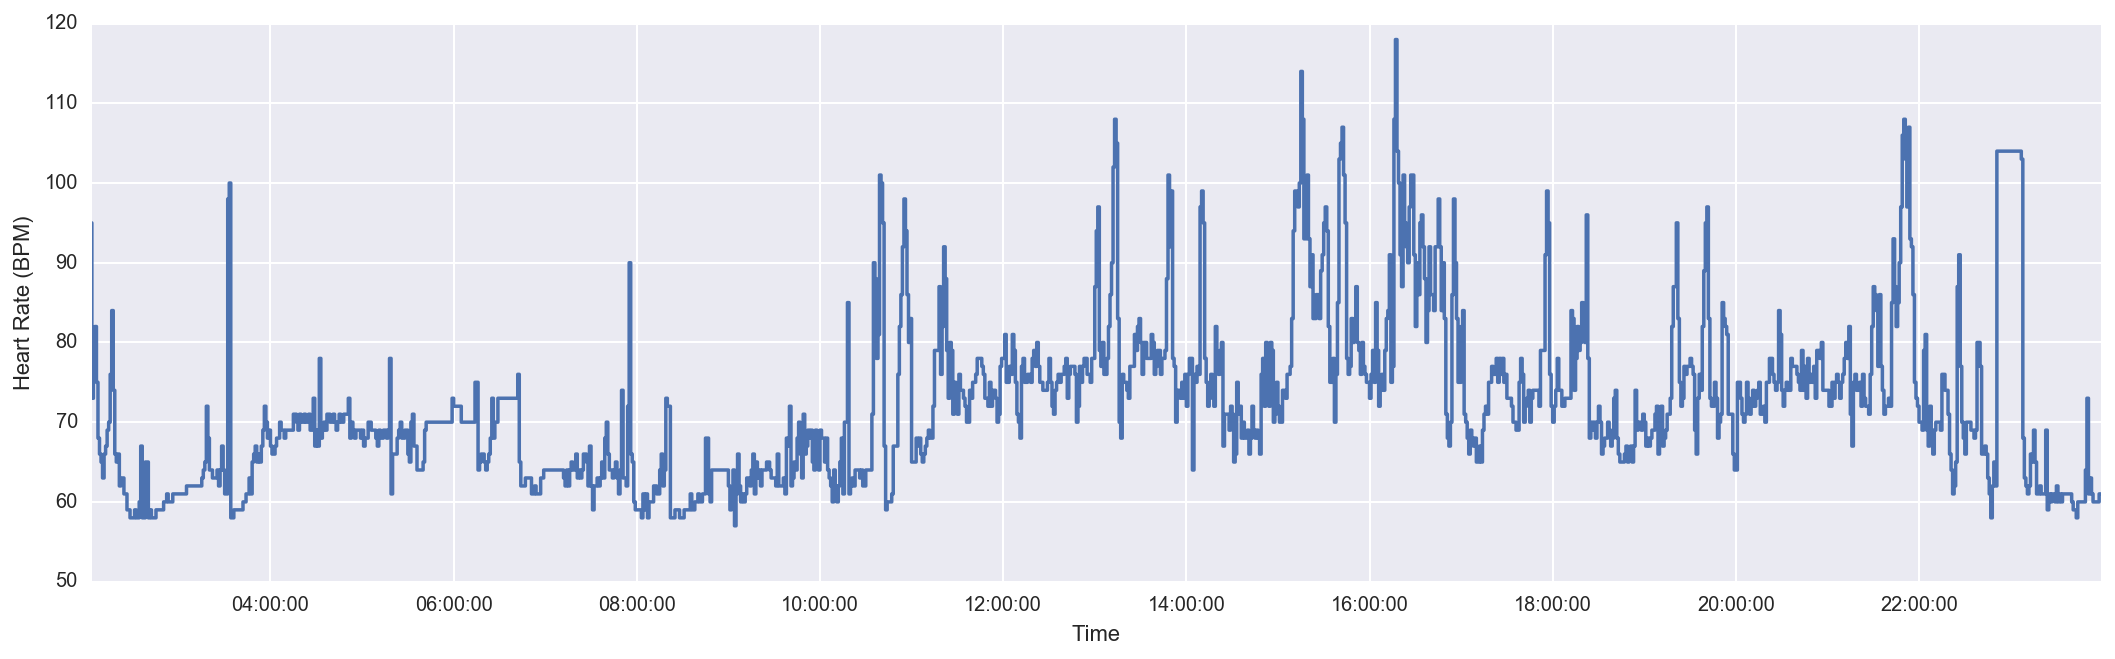

In [27]:
plt.figure(figsize=(18, 5))
plt.step(HR_intra_1min.TimeStamp, HR_intra_1min.value)
plt.ylabel('Heart Rate (BPM)')
plt.xlabel('Time')

Hmm... some gaps in the data (the flat tops)-- perhaps I took off the band momentarily or it could not get a good measurement for some reason (interference or whatever).

Many questions-- are those localized maxima spikes real?  How or whether-or not to impute the missing data?  Why did the measurement start late?  (This was New Year's day in Austin, I think I left my fitbit at home until I got back from Chris's party.)

## Intraday sleep?

In [28]:
#!curl -H "Authorization: Bearer ###SECRET_KEY###" https://api.fitbit.com/1/user/-/sleep/date/2017-01-01.json > ../data/###USER_NAME###/Sleep_2017-01-01_1d_1min.json

In [29]:
with open('../data/gully/Sleep_2017-01-01_1d_1min.json') as f:
    Sleep_intra_1min_json = json.load(f)

In [30]:
Sleep_intra_1min_json.keys()

dict_keys(['summary', 'sleep'])

In [31]:
Sleep_intra_1min_json['summary']

{'totalMinutesAsleep': 412, 'totalSleepRecords': 1, 'totalTimeInBed': 447}

Because sleep can have multiple episodes/phases/Records, the json `sleep` returns a *list* of Records.  In this case the list has length 1, *i.e.* I only had one contiguous sleep episode on this day (no naps later in the day on New Year's Day!).

In [32]:
len(Sleep_intra_1min_json['sleep']), type(Sleep_intra_1min_json['sleep'])

(1, list)

In [33]:
Sleep_intra_1min = pd.DataFrame(Sleep_intra_1min_json['sleep'][0]['minuteData'])

In [34]:
Sleep_intra_1min.head()

,dateTime,value
0,02:21:00,3
1,02:22:00,2
2,02:23:00,1
3,02:24:00,1
4,02:25:00,1


In [35]:
Sleep_intra_1min['TimeStamp'] = pd.to_datetime('2017-01-01 '+Sleep_intra_1min.dateTime)
Sleep_intra_1min['value'] = Sleep_intra_1min.value.astype(np.int)

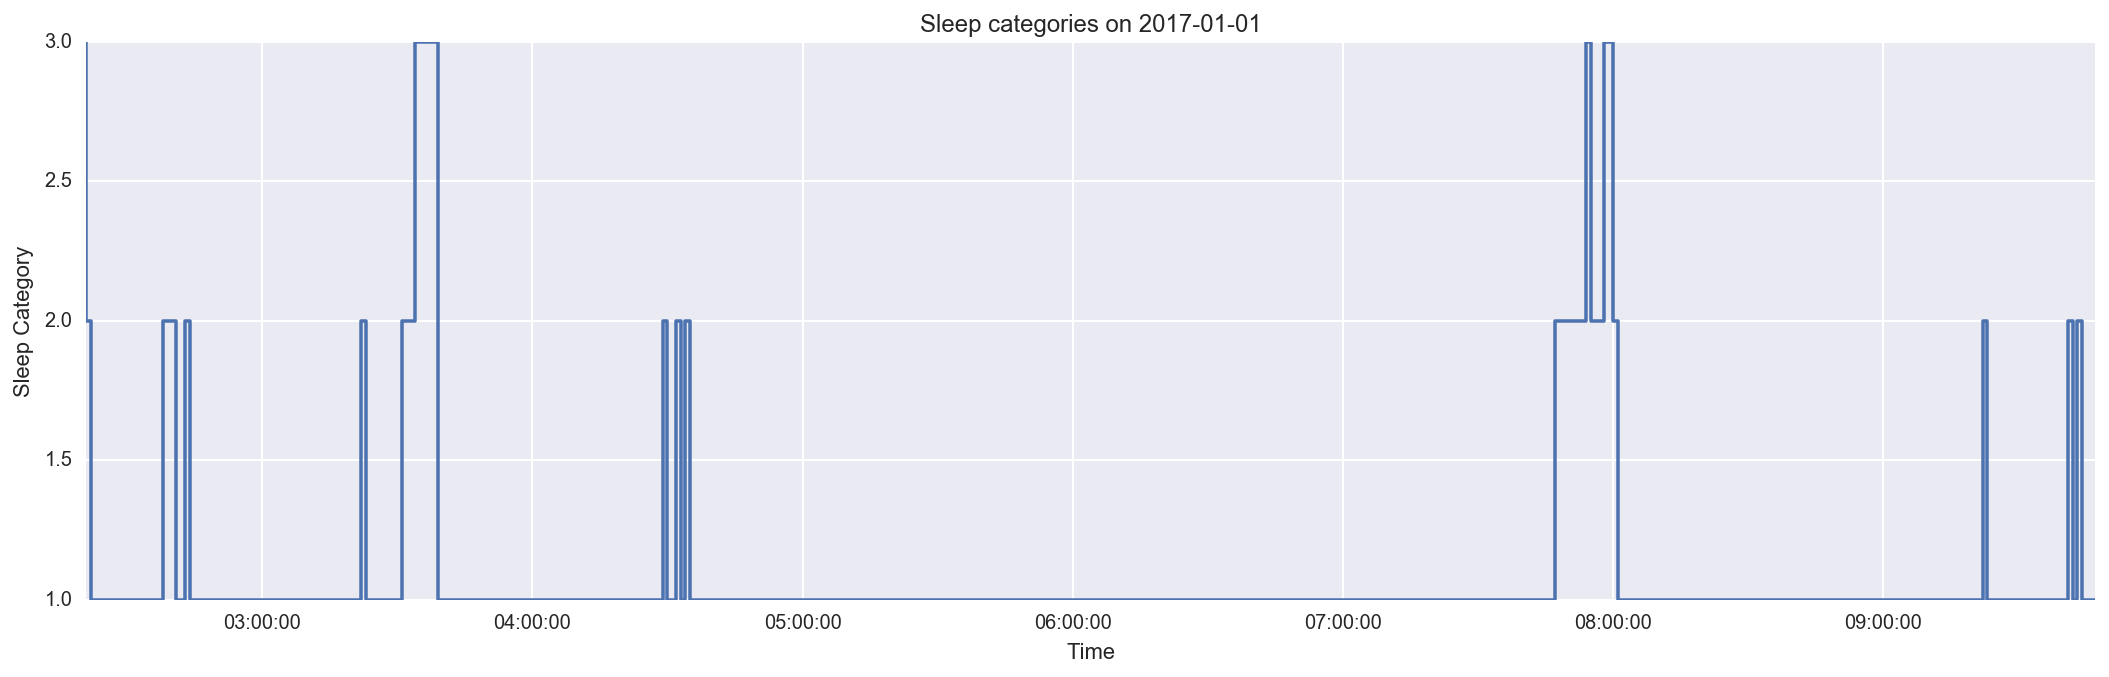

In [36]:
plt.figure(figsize=(18, 5))
plt.step(Sleep_intra_1min.TimeStamp, Sleep_intra_1min.value)
plt.ylabel('Sleep Category')
plt.xlabel('Time')
plt.title('Sleep categories on 2017-01-01');

From the API we have: **1** ("asleep"), **2** ("awake"), or **3** ("really awake")

## Combine them all

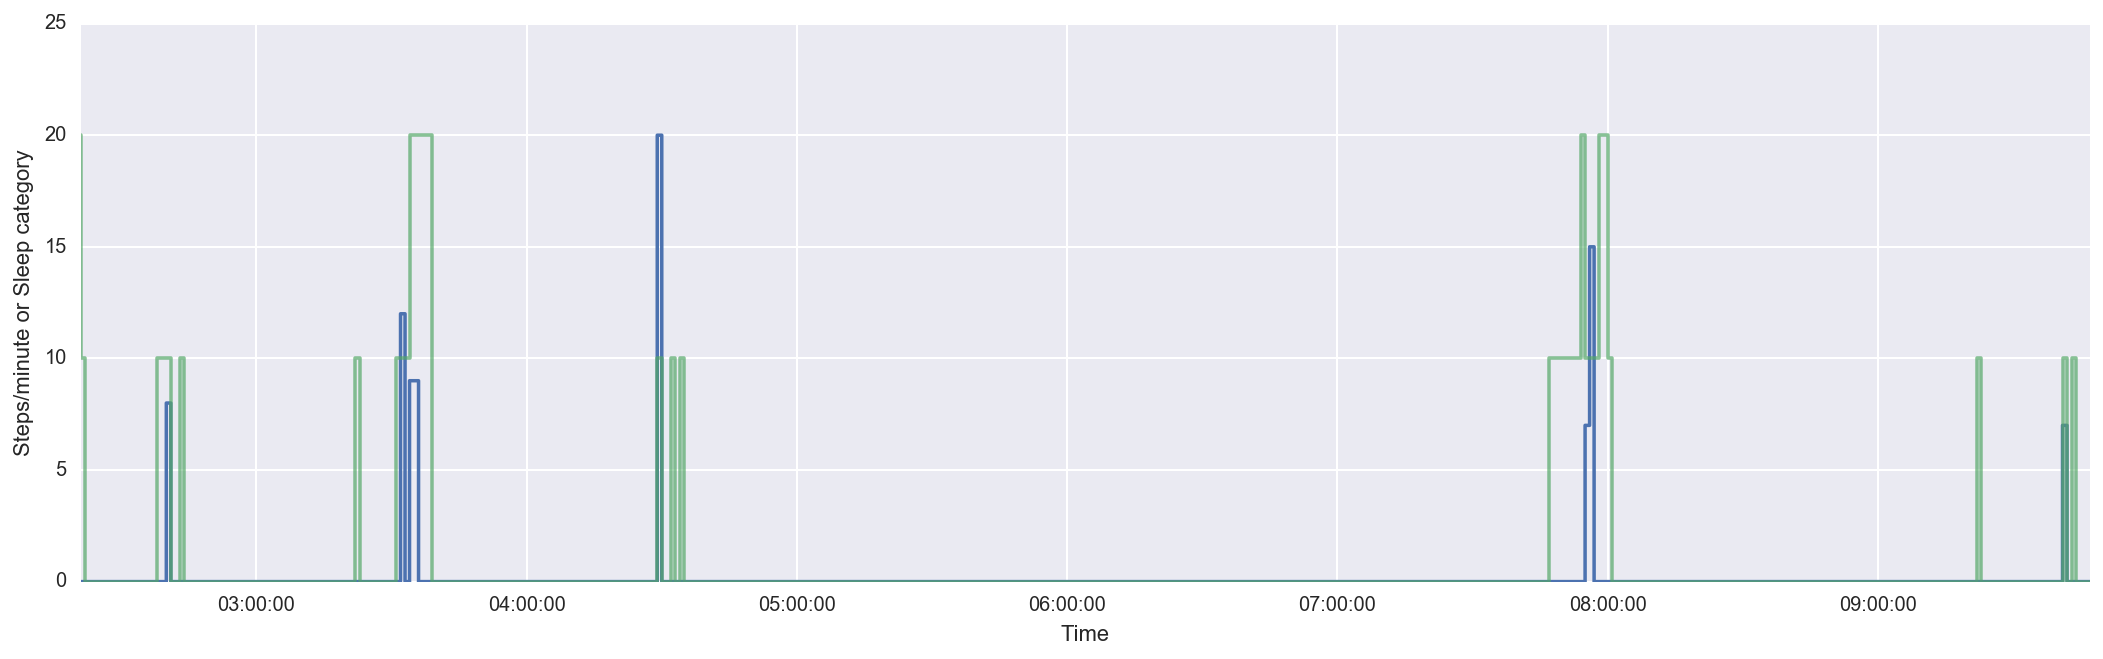

In [37]:
plt.figure(figsize=(18, 5))
plt.step(steps_intra_1min.TimeStamp, steps_intra_1min.value)
plt.step(Sleep_intra_1min.TimeStamp, (Sleep_intra_1min.value-1)*10, alpha=0.7)
plt.ylabel('Steps/minute or Sleep category')
plt.xlabel('Time')
plt.xlim(Sleep_intra_1min.TimeStamp[0], Sleep_intra_1min.TimeStamp.max())
plt.ylim(0,25);

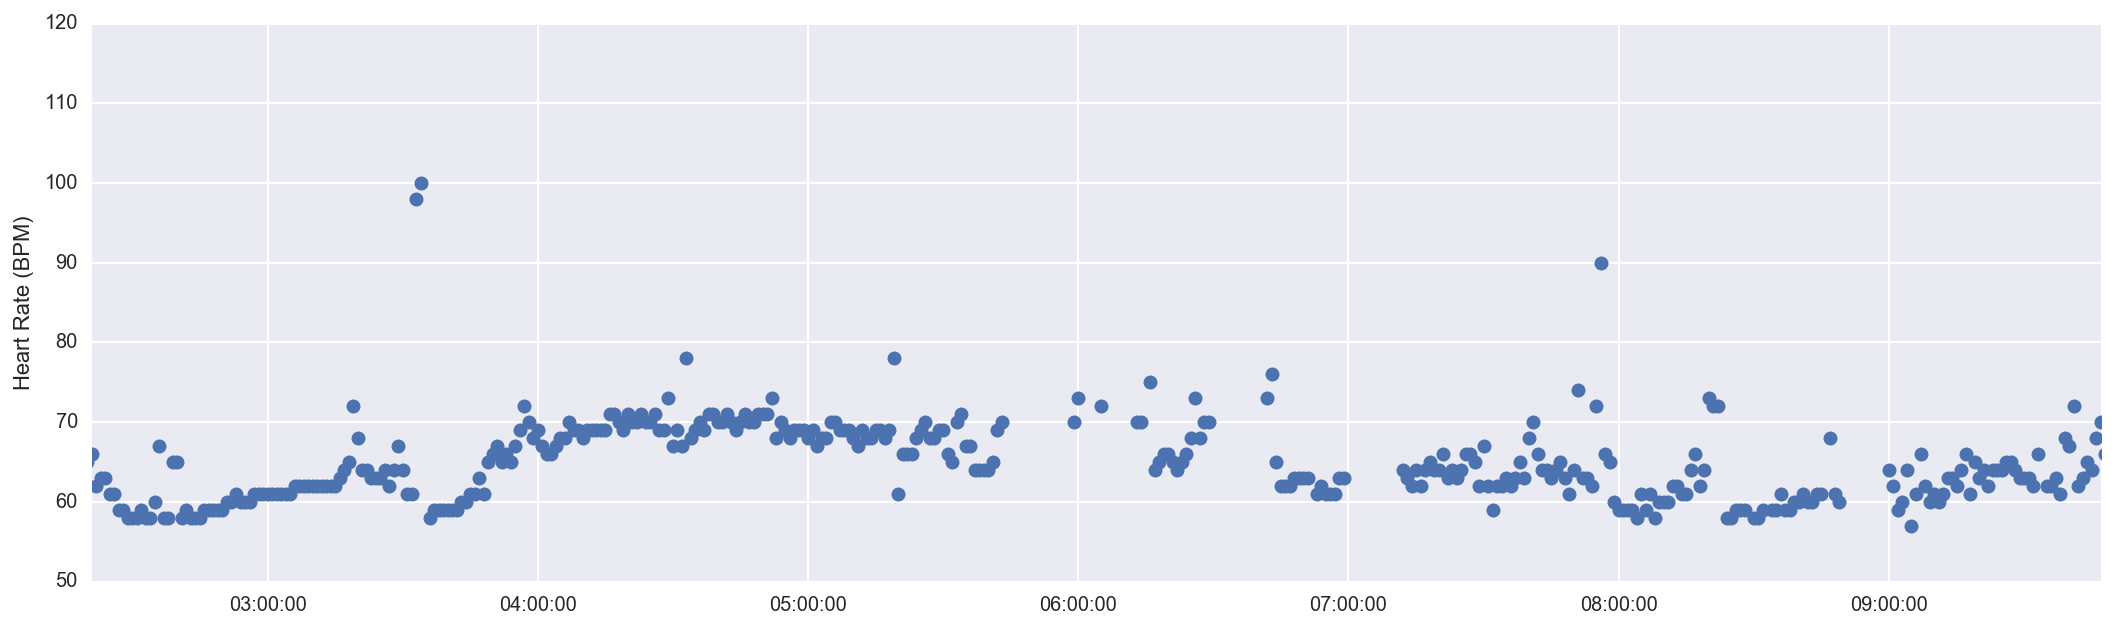

In [38]:
plt.figure(figsize=(18, 5))
plt.plot(HR_intra_1min.TimeStamp, HR_intra_1min.value, 'o')
plt.ylabel('Heart Rate (BPM)')
plt.xlim(Sleep_intra_1min.TimeStamp[0], Sleep_intra_1min.TimeStamp.max());

So when I'm "really awake", my Charge 2 registers both a finite number of steps **and** and elevated heart rate (90 BPM+)

## Conclusions

In summary the fitbit intraday data is **awesome**.  We can get the 1-minute cadence data, and do whatever we want with it.

## Next steps
In the next series of notebooks we will move beyond `curl` and instead use the `requests` library to programmatically fetch the intraday time series.